<a href="https://colab.research.google.com/github/PoojaSwamii/Capstone-Project----Coronavirus-Tweet-Sentiment-Analysis-Classification-/blob/main/Capstone_Project_III_Covid_19_Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME - Sentiment Analysis : Predicting sentiment of COVID-19 tweets**

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Pooja Swami
##### **Email Id -** poojaswami0201@gmail.com

# **Project Summary -**

The goal of this capstone project is to build a classification model to predict the sentiment of COVID-19 tweets using machine learning algorithms. The dataset used in this project has been pulled from Twitter and manually tagged to identify the sentiment of each tweet. The sentiment is classified into five categories: extremely positive, extremely negative, positive, negative, and neutral.

The dataset includes various features such as the name and screen name of the user, the location where the tweet was made, the date on which the tweet was made, and the actual text of the tweet. These features will be used to train and test the machine learning model to predict the sentiment of new tweets.

The project begins with exploratory data analysis, where I'll analyze the distribution of the target variable and examine the relationship between the other features and the target variable. I will also preprocess the data by removing any irrelevant features, handling missing data, and cleaning the text data.

After data preprocessing, I will apply different machine learning algorithms to classify the sentiment of COVID-19 tweets. I will evaluate the performance of each algorithm based on metrics such as accuracy, precision, recall, and F1 score.

I will also perform hyperparameter tuning to optimize the performance of the best-performing algorithm. This will involve using techniques such as grid search or random search to find the best combination of hyperparameters for the algorithm.

Finally, I will present the results of the project in a report that includes a summary of the exploratory data analysis, the machine learning algorithms used, and the evaluation metrics for each algorithm.

In conclusion, this capstone project on sentiment analysis of COVID-19 tweets using machine learning algorithms is an exciting and challenging task. It involves working with real-world data, applying various machine learning algorithms, and evaluating their performance. The results of this project can be used to better understand the sentiment of people towards COVID-19 and help in developing strategies to address the challenges posed by the pandemic.

# **GITHUB LINK:-**

https://github.com/PoojaSwamii

# **Problem Statement**

**This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.**

**The names and usernames have been given codes to avoid any privacy concerns.**

**The features present in the data are --**



1- Username - Name of the user

2- ScreenName - Screen name of the user

3- Location - The place at which the tweet was made

4- TweetAt - The date on which the tweet was made

5- OriginalTweet - This is the actual text of the tweet

6- Sentiment - It is the sentiment of tweets, which is a multiclass classification with 5 classes which are ; Extremely positive, Extremely negative, positive, negative, neutral.

# ***Let's Begin !***

## ***1. Know Your Data***

# **IMPORTING LIBRARIES**

In [1]:
# Importing Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import make_scorer,classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import f1_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud, ImageColorGenerator

 **Loading the dataset**

In [2]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Giving the file path

file_path = ('/content/drive/MyDrive/AlmaBetter/Coronavirus Tweets.csv')
df = pd.read_csv(file_path, encoding = 'ISO-8859-1')

**Dataset First view**

In [5]:
# Checking top 5 rows in dataframe
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
# Checking last 5 rows in dataframe
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


**Dataset Rows & Columns count**

In [7]:
# Data shape
df.shape

(41157, 6)

In [8]:
#Check all the coloumns present in our dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

**Dataset Information**

## ***2. Understanding Your Variables***

In [9]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df.describe()

**Variables Description**

1- Username - Name of the user

2- ScreenName - Screen name of the user

3- Location - The place at which the tweet was made

4- TweetAt - The date on which the tweet was made

5- OriginalTweet - This is the actual text of the tweet

6- Sentiment - It is the sentiment of tweets, which is a multiclass classification with 5 classes which are ; Extremely positive, Extremely negative, positive, negative, neutral.

**Check Unique Values for each variable**.

**Duplicate Values**

In [10]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


**Checking Unique Value**

In [11]:
# Looking for unique values in columns of dataset
for i in df.columns:
  print("Total Unique Values in", i, "-", len(df[i].unique()))

Total Unique Values in UserName - 41157
Total Unique Values in ScreenName - 41157
Total Unique Values in Location - 12221
Total Unique Values in TweetAt - 30
Total Unique Values in OriginalTweet - 41157
Total Unique Values in Sentiment - 5


## 3. ***Data Wrangling***

# **Null Value Analysis-**

In [12]:
# Checking null value
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [13]:
# Importing missingo
import missingno as msno

In [14]:
# 1-step make the list of features which has missing values
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
# 2-step print the feature name and the percentage of missing values
for feature in feature_with_na:
  print(feature, np.round(df[feature].isnull().mean(), 4)*100,  " % missing values")

Location 20.87  % missing values


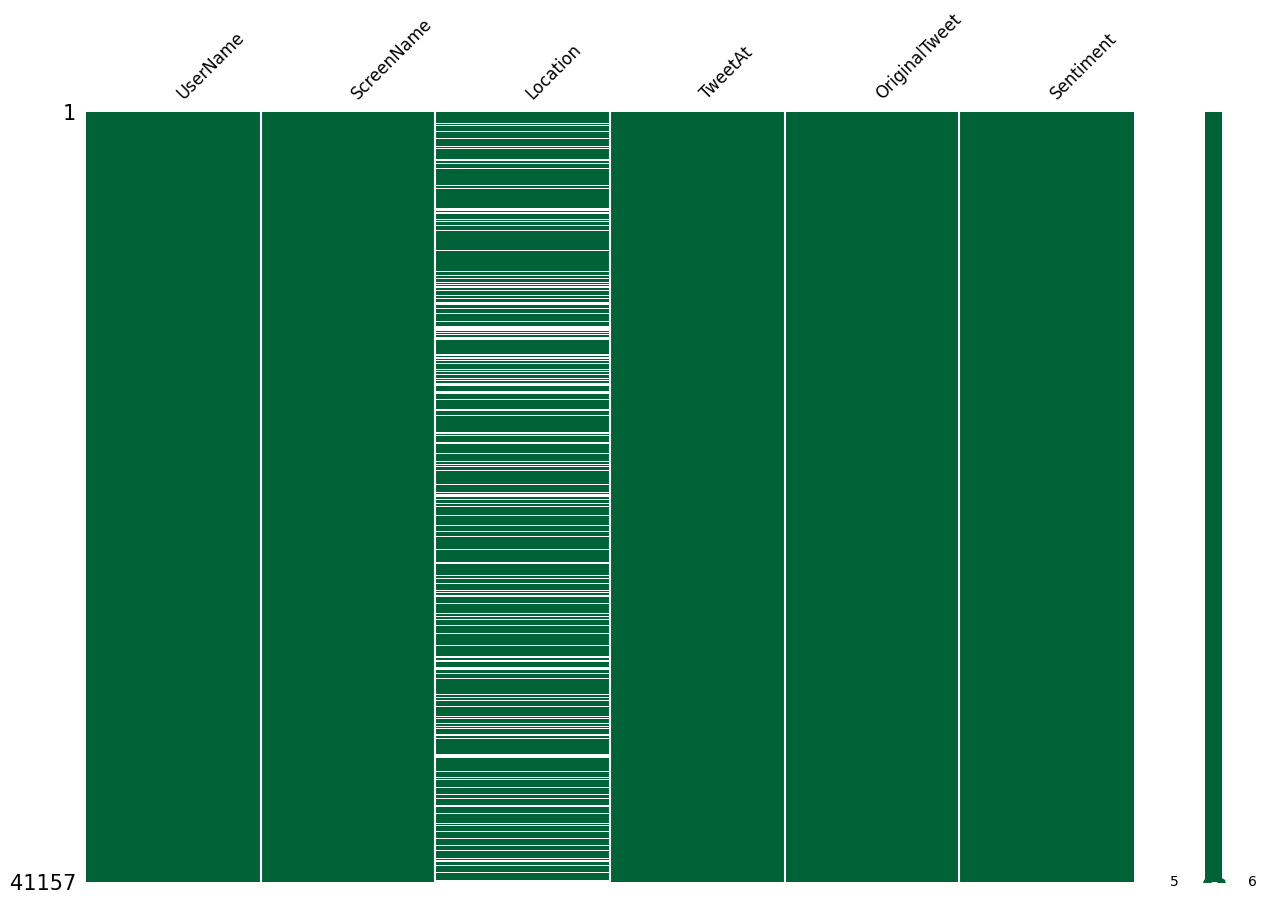

In [15]:
msno.matrix(df, figsize=(15,10), fontsize=12, color=(0, 0.39, 0.22));

# **Exploratory Data Analysis**

**OVERVIEW-**

* The original dataset has 6 columns and 41157 rows. In order to analyse various sentiments, We require only two columns named 'Original Tweet' and 'Sentiment'.

* The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.

* There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.

 
* There are various #hashtags in tweets column to explore. People have different sentiments about various issues to shows their optimism during pandemic times.

**When did the Tweets Started ?**

In [16]:
# Count value of TweetAt 
df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [17]:
# Describing TweetAt
df.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Chart - 1**

**Count plot**-

* It show the counts of observations in each categorical bin using bars.

* The countplot is used to represent the counts of the observation present in the categorical variable.

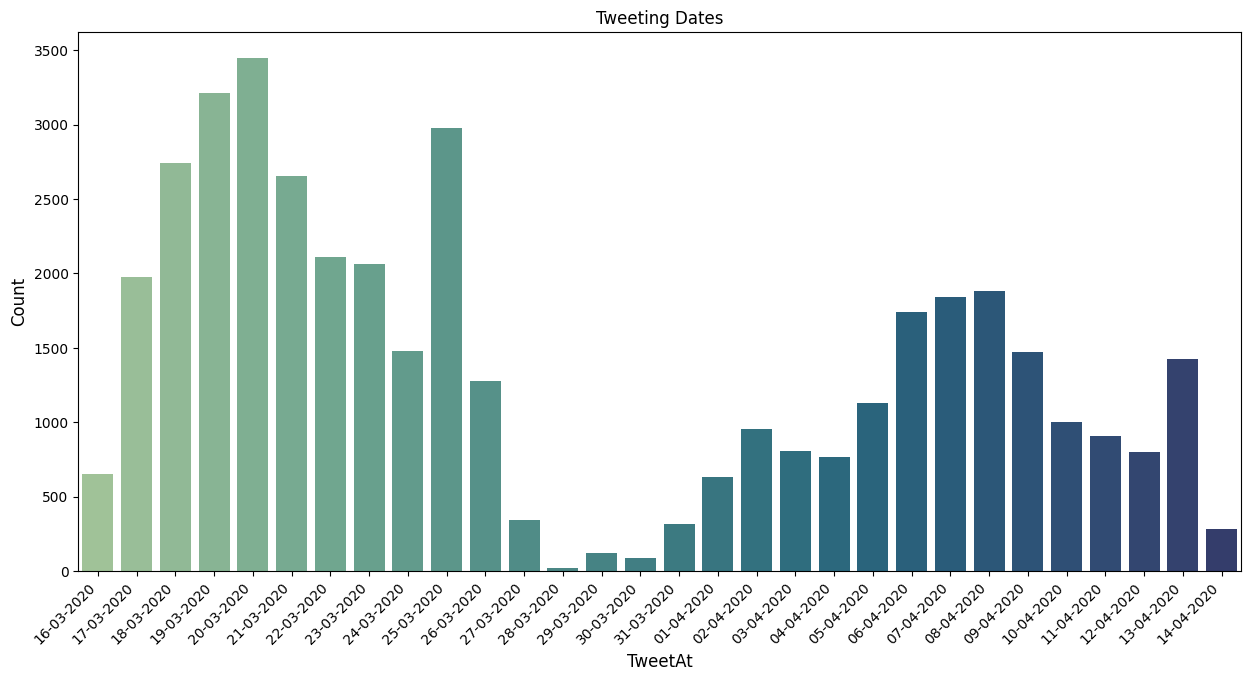

In [18]:
# Distribution of Tweets Date
plt.figure(figsize=(15,7))
sns.countplot(x='TweetAt', data=df, palette ="crest")
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Dates")
plt.ylabel("Count", fontsize = 12)
plt.xlabel("TweetAt",fontsize = 12)
plt.show()

*1. Why did you pick the specific chart?*

* To show the tweeting dates which occured from 16 march 2020 to 14 april 2020.


*2. What are the insight(s) found from the chart?*

* The above count plot shows the overall distribution of different tweeting dates in the dataset. Starting from mid-month of March 2020 to mid-month of April 2020.

* We can see that the date 20-03-2020 has the maximum count value among all the other occuring dates.

* The tweeting date ranges from 16-03-2020 to 14-04-2020, which is approx 30 days in total

* Least count value is for date 28-03-2020.



**Origins of Tweets and Top Tweeter Locations-**

In [19]:
# Looking the count value of different Location 
df.Location.value_counts().head(15)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Name: Location, dtype: int64

In [20]:
# Describing the Location 
df.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

**Chart - 2**

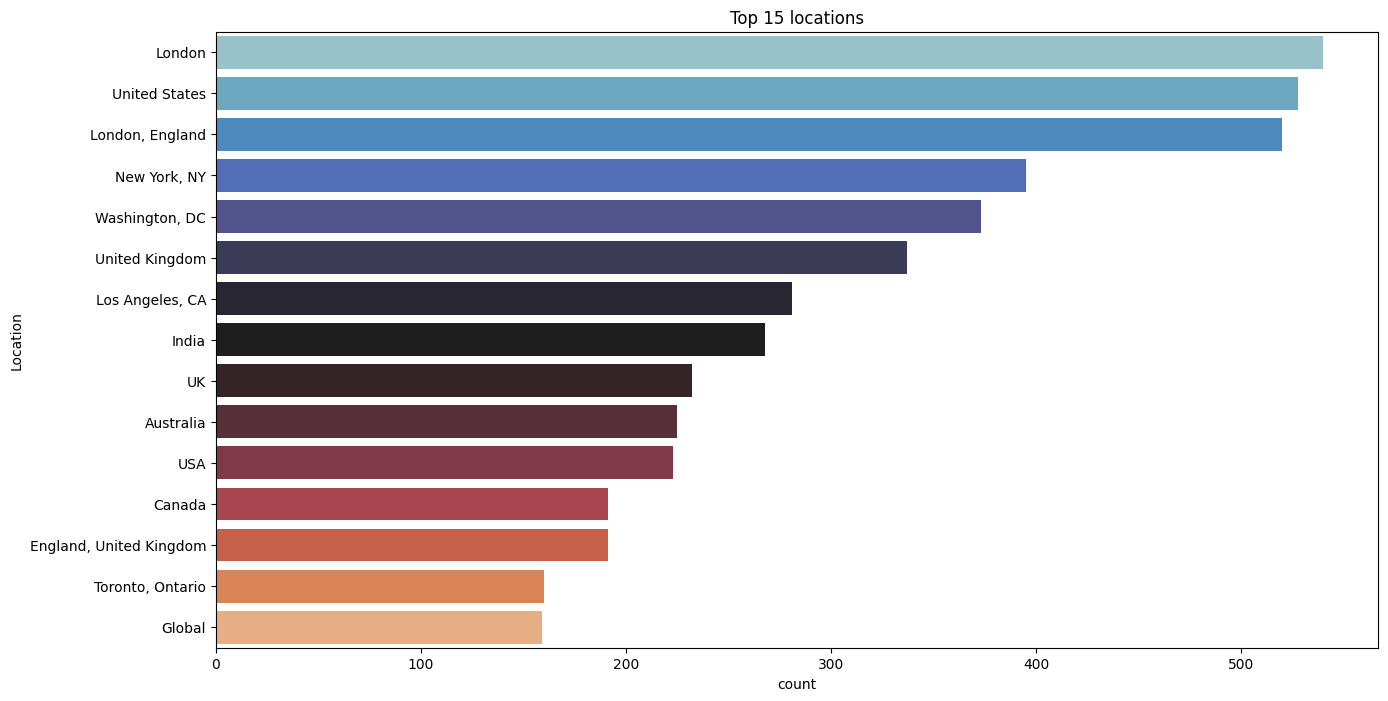

In [21]:
# Looking for top 15 Countries in Countplot
plt.figure(figsize=(15,8))
sns.countplot(y = df.Location, order = df.Location.value_counts().iloc[:15].index, palette ='icefire')
plt.title('Top 15 locations')
plt.show()

*1. Why did you pick the specific chart?*

* To see top tweeting countries.


*2. What are the insight(s) found from the chart?*

* The above count plot shows the top 15 locations in the dataset.

* London being the most tweeting locatioin from the bunch.

* We can see some peculiarity in the dataset i.e. "London" and "London, England" are represented as two different locations. This can be ignored as this wont be helping in the Sentiment Analysis process.

* Second place is of United States and India ranks at 8th place.

# **Sentiment Analysis-**

In [22]:
# Describing the sentiments
df.Sentiment.describe()

count        41157
unique           5
top       Positive
freq         11422
Name: Sentiment, dtype: object

In [23]:
# Checking unique values in Sentiment
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [24]:
# Data has 5 classes of Sentiments, hence we are converting them into 3
def conversion(x):

  if x == 'Extremely Positive':
    return "Positive"
  if x == 'Positive':
    return "Positive"   
  elif x == "'Extremely Negative":
    return "Negative"  
  elif x == "Negative":  
    return "Negative"  
  else:
    return "Neutral" 

df["Sentiment"] = df["Sentiment"].apply(lambda x : conversion(x))    

df.Sentiment.value_counts()

Positive    18046
Neutral     13194
Negative     9917
Name: Sentiment, dtype: int64

In [25]:
# Creating df for sentiment and originaltweet
analysis = df.groupby("Sentiment").count()['OriginalTweet'].reset_index().sort_values(by='OriginalTweet',ascending=False)
analysis

,Sentiment,OriginalTweet
2,Positive,18046
1,Neutral,13194
0,Negative,9917


**Chart - 3**

**Plot** - It represents data visually as a fractional part of a whole, which can be an effective communication tool for the even uninformed audience.

It enables us to see comparison at a glance to make an immediate analysis or to understand information quickly.

The need for readers to examine or measure underlying numbers themselves are removed by using this chart

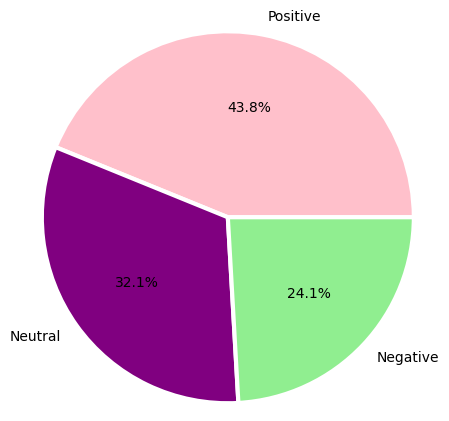

In [26]:
# plot on Sentiment categorical variable
percent_class = analysis['OriginalTweet']
labels= analysis.Sentiment
plt.figure(figsize=(5,6))
colors = ['pink', 'purple','lightgreen']
fig=plt.pie(percent_class,labels=labels,colors=colors,autopct="%.1f%%",radius =1.2,wedgeprops= {"edgecolor":"white",
                     'linewidth': 3,
                     'antialiased': True})

*1. Why did you pick the specific chart?*

* To visualize the sentiments with their percentage.


*2. What are the insight(s) found from the chart?*

* Positive - 48.8%
* Negative - 24.1%
* Neutral - 32.1%

**Chart - 4**

<Axes: xlabel='Sentiment', ylabel='count'>

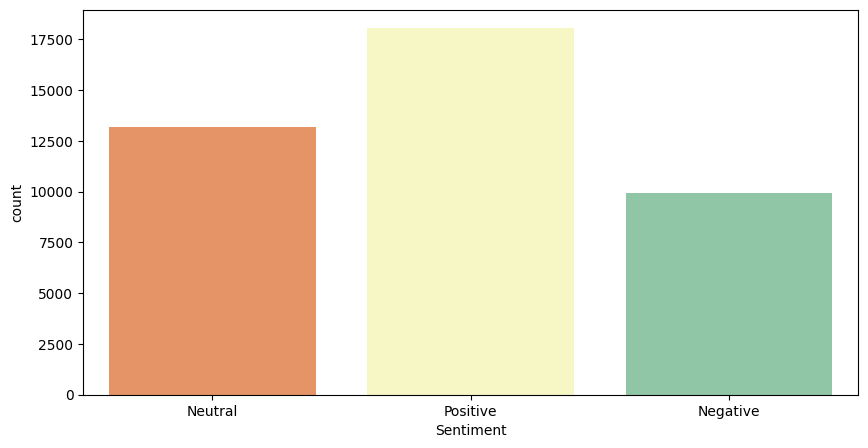

In [27]:
# Count plot for sentiments
plt.subplots(figsize=(10,5))
sns.countplot(x='Sentiment', data = df, palette='Spectral')


1. What are the insight(s) found from the chart?

* We can see that most people are having positive sentiment about issue in pandemic

* Some are having neutral thoughts and less are negative.

**Chart - 5**

**Number of characters of each sentiments types**

**Histogram plot** -

* A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

* It represent the data distribution by forming bins along the range of data and then drawing bars to show the number of observations that fall in each bin.

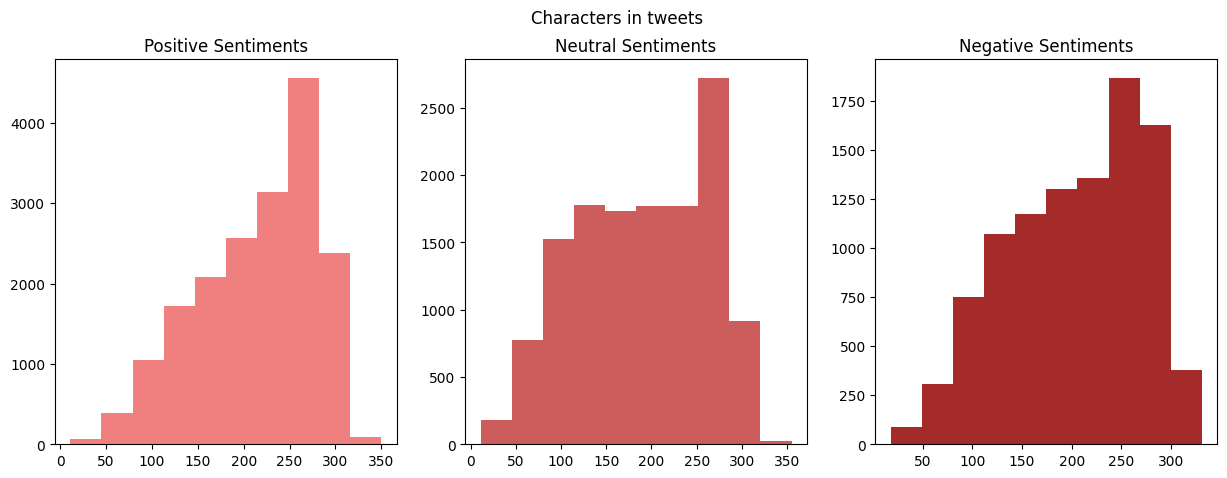

In [28]:
# Histogram
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

# Histogram for Positive Sentiments
tweet_len= df[df['Sentiment'] == "Positive"]["OriginalTweet"].str.len()
ax1.hist(tweet_len,color='lightcoral')
ax1.set_title('Positive Sentiments')

# Histogram for Neutral Sentiments
tweet_len=df[df['Sentiment']=="Neutral"]['OriginalTweet'].str.len()
ax2.hist(tweet_len,color='indianred')
ax2.set_title('Neutral Sentiments')

# Histogram for Negative Sentiments
tweet_len=df[df['Sentiment']=="Negative"]['OriginalTweet'].str.len()
ax3.hist(tweet_len,color='brown')
ax3.set_title('Negative Sentiments')



fig.suptitle('Characters in tweets')
plt.show()

**Chart - 6**

**Times between different tweeting date and sentiments associated with the particular date**

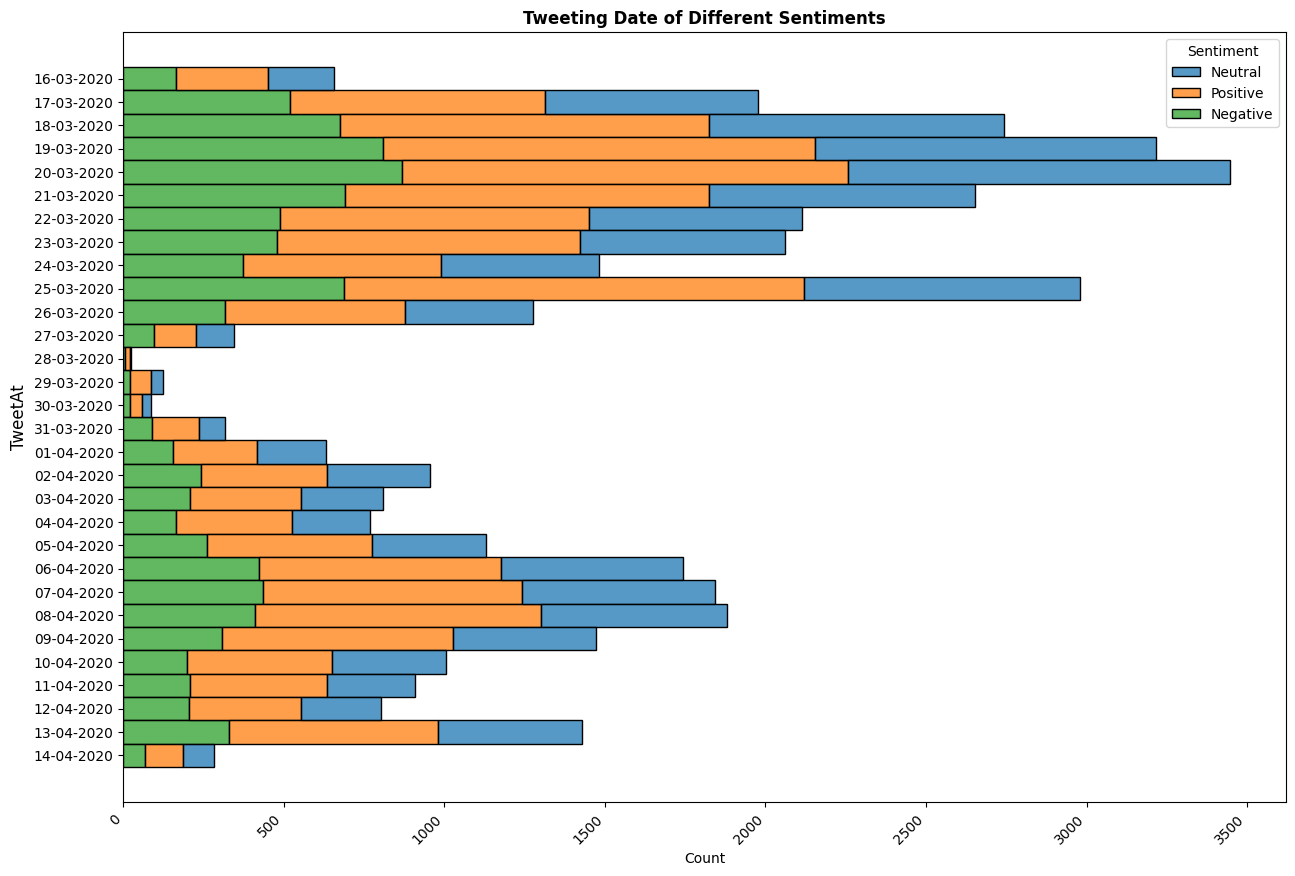

In [29]:
# Plotting Tweet date with different sentiments
plt.figure(figsize=(15,10))
sns.histplot(data = df, y= "TweetAt", hue="Sentiment", multiple="stack")
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Date of Different Sentiments", fontweight='bold')
plt.ylabel("TweetAt",fontsize = 12)
plt.show()

*1. Why did you pick the specific chart?*
* To visualize sentiments with their specific date and how which type of tweets were their.

*2. What are the insight(s) found from the chart?*

* The above plot shows the distribution of different sentiments on the basis of tweeting date.

* It can be analysied that date on 20-03-2020, when maximum tweet took place showing the maximum sentiment types. Among all the sentiments, positive sentiment dominates the most followed by the negative in second place.


* Least tweeting date is 28-03-2020, according to plot, where the number of sentiments is also very less in compare to other dates.


* The number of positive sentiment tweet can be observed on 25-03-2020.
In same way maximum neutral sentiment tweeted on 20-03-2020.
Positive sentiment tweeted most on 25-03-2020 whereas extremely negative sentiment tweeted most on 20-03-2020.

* By seeing all the insight, it can be sensed that this period on 30 days, most number of tweets can been seen in the month of March in compare to April month for year 2020.

* This period is also important to note because from the month of March, globally the number COVID-19 cases started, which triggered many people.

# **Data Preprocessing**

**Punctuations**

In [30]:
# Dwonloading stopwords from nltk library 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from collections import defaultdict
dic=defaultdict(int)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
# Function to create a corpus 
def create_corpus(target):
    corpus=[] 
    for x in df[df['Sentiment']==target ]['OriginalTweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

**Chart - 7**

<BarContainer object of 27 artists>

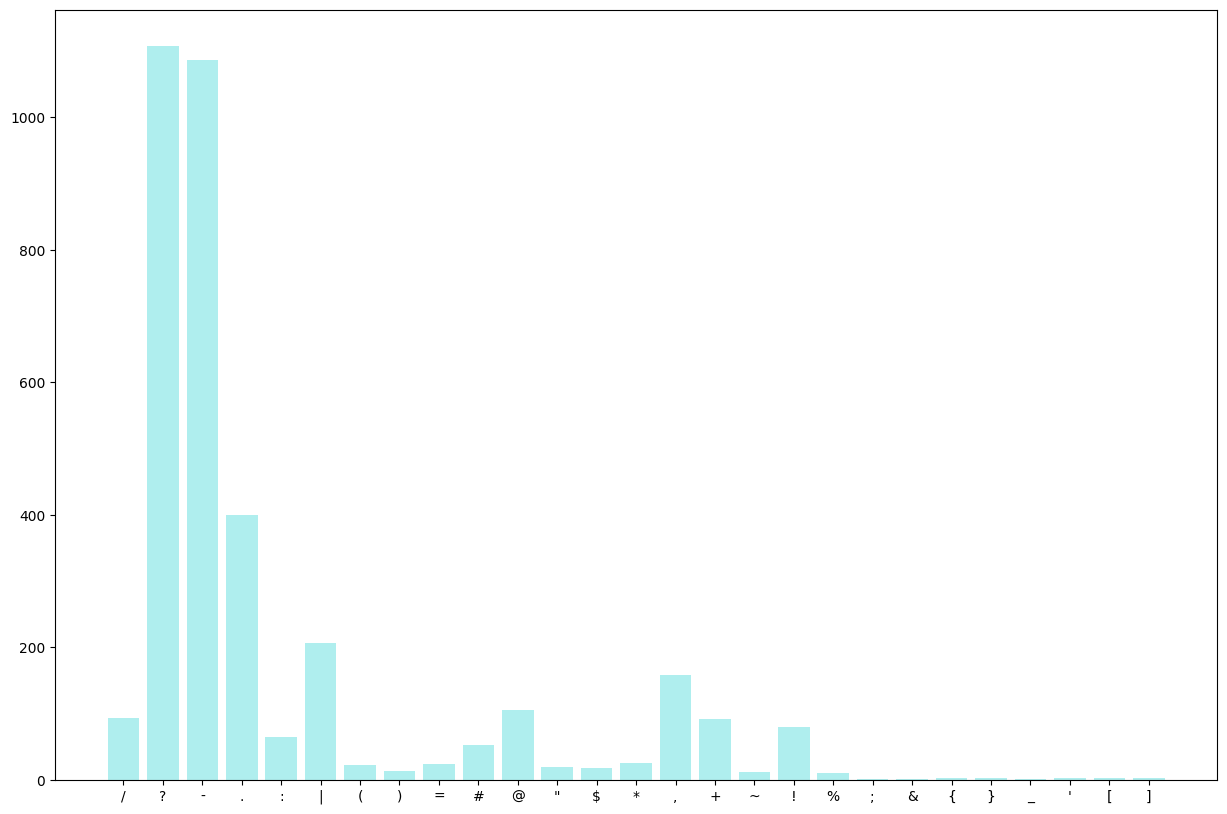

In [32]:
# Punctuations in Positive sentiments
plt.figure(figsize=(15,10))
corpus=create_corpus("Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='paleturquoise')

*1. What are the insight(s) found from the chart?*
* The punctuations ? and - were more in positive sentiments.

**Chart - 8**

<BarContainer object of 26 artists>

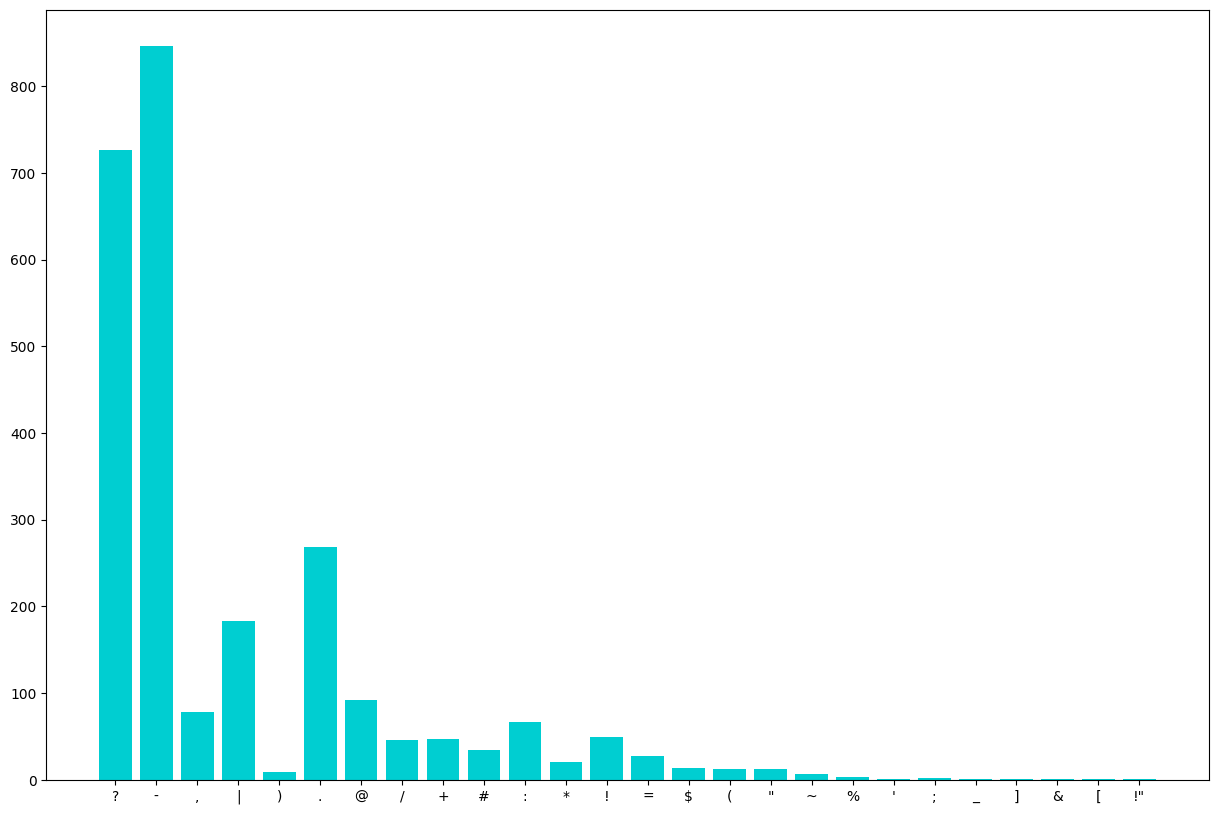

In [33]:
# Punctuations in Neutral sentiments
plt.figure(figsize=(15,10))
corpus=create_corpus("Neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

        
x,y=zip(*dic.items())
plt.bar(x,y,color='darkturquoise')

*1. What are the insight(s) found from the chart?*
* The punctuations ? was used most in neutral sentiments.

**Chart - 9**

<BarContainer object of 23 artists>

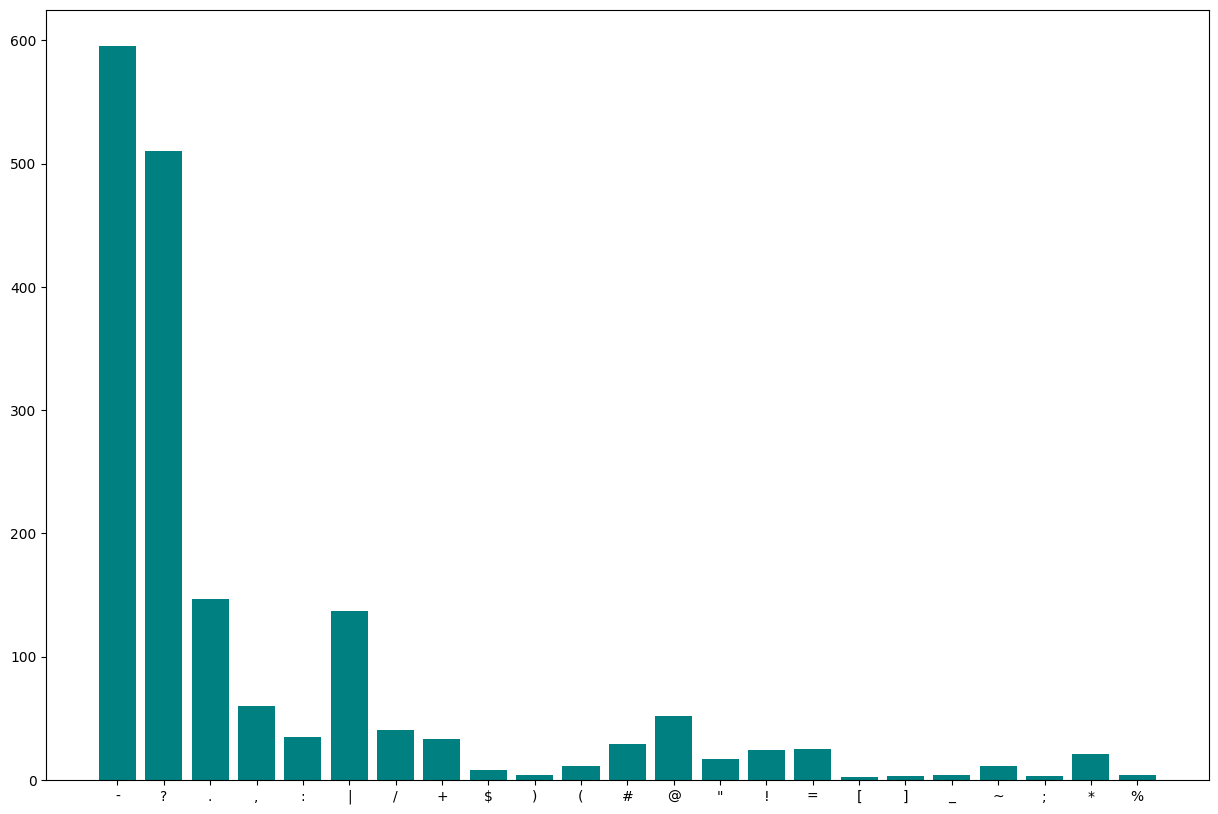

In [34]:
# Punctuations in Negative sentiments
plt.figure(figsize=(15,10))
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())
plt.bar(x,y, color='teal')

*1. What are the insight(s) found from the chart?*
* The punctuation - was used most in negative sentiments.

**Text Cleaning**-

* Text cleaning here, refers to the process of removing or transforming certain parts of the text so that the text becomes more easily understandable for NLP models that are learning the text. 

* This often enables NLP models to perform better by reducing noise in text data.



In [35]:
# Making a copy 
twt_df = df.copy()


***A) Removing @user***

In [36]:
# writing function for removing @user
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

***B) Removing url, http, etc-***

In [37]:
# create new column with removed @user
twt_df['Clean_tweet'] = np.vectorize(remove_pattern)(twt_df['OriginalTweet'], '@[\w]*')
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,"Me, ready to go at supermarket during the #COV..."


In [38]:
# removing characters
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,"Me, ready to go at supermarket during the #COV..."


***C) Remove punctions, words which are not formed letters***-

* The punctuation removal process  help's to treat each text equally. 

* For example, the word data and data! are treated equally after the process of removal of punctuations.

In [39]:
# remove special characters, numbers, punctuations
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,Me ready to go at supermarket during the #COVI...


***D) Removing stop words***-

* Stopwords are some very common words which may contain very little value in helping select documents or modelling for NLP.

* These words may be dropped or removed from text data when we perform pre-processing.

* This is because stop words may not add value to improving the accuracy of NLP models due to their excessive frequency.

In [40]:
# remove stop words
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,ready supermarket during the #COVID outbreak N...


***E) Creating new variable tokenized tweet***

In [41]:
# create new variable tokenized tweet 
tokenized_tweet = twt_df['Clean_tweet'].apply(lambda x: x.split())
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,ready supermarket during the #COVID outbreak N...


***F) Converting text data to lowercase***-



*  The idea is to convert the input text into the same casing format so that it converts ‘DATA’, ’Data’, ‘DaTa’, ‘DATa’ into ‘data’.

In [ ]:
# Creating lower case 
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

***G) Stemming***-

* Stemming is like a grammatical term, where suffix are removed which are already defined.

* Ex- help, helping, helped, helper /after becomes/ help.

* It is used where we don't need to know the meaning of the context.

In [42]:
# Importing Stemming library
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [43]:
# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,ready supermarket during the #COVID outbreak N...


***H) Tokenization***-

* Tokenization is breaking the raw text into small chunks.It breaks the raw text into words, sentences called tokens. 

* These tokens help in understanding the context or developing the model for the NLP.

* For example- the text “It is raining” can be tokenized into ‘It’, ‘is’, ‘raining’

In [44]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Clean_tweet'] to tokenized_tweet

In [45]:
#Checking df head
twt_df['Clean_tweet']  = tokenized_tweet
twt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk your neighbour famili exchang phone...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the onli one which empti pleas ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Neutral,readi supermarket dure the #covid outbreak not...


# **Story Generation from Tweets**

**Chart - 10**

**WORD CLOUD**

* A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.

**Getting major words in every sentiment-**

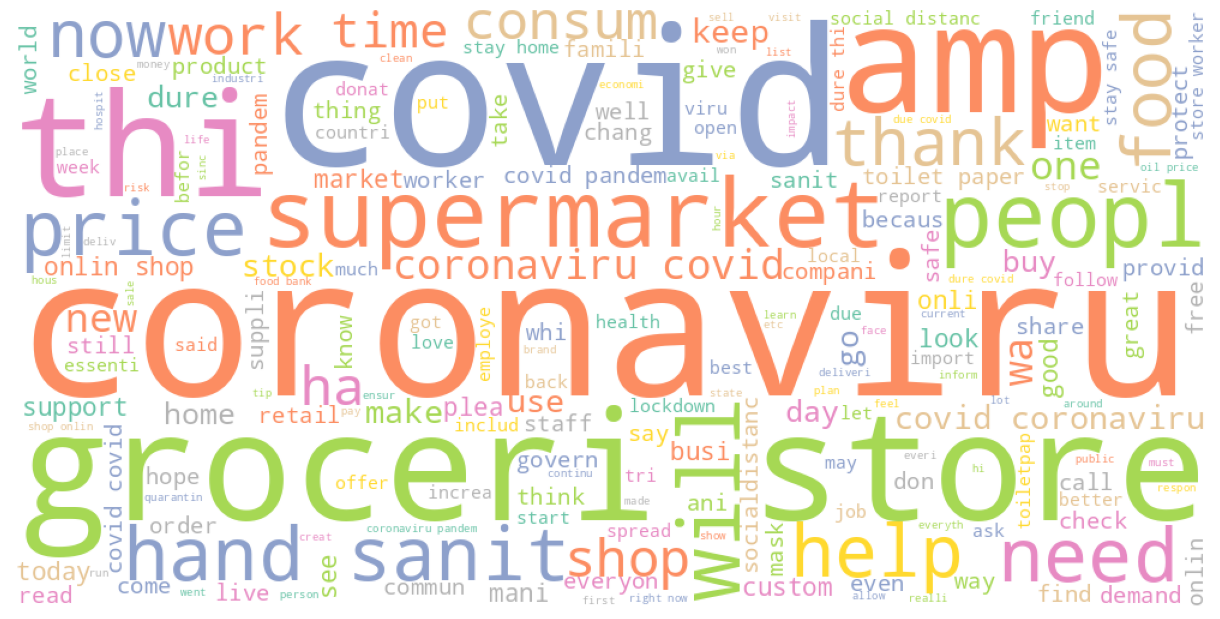

In [46]:
#WordCloud for positive tweets
positive_tweets = ' '.join([text for text in twt_df['Clean_tweet'][twt_df['Sentiment'] == 'Positive']])
wordcloud = WordCloud(width=1000, height=500, background_color ='white',colormap='Set2').generate(positive_tweets)
plt.figure(figsize=(15, 6), facecolor = "white")
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

**Chart - 11**

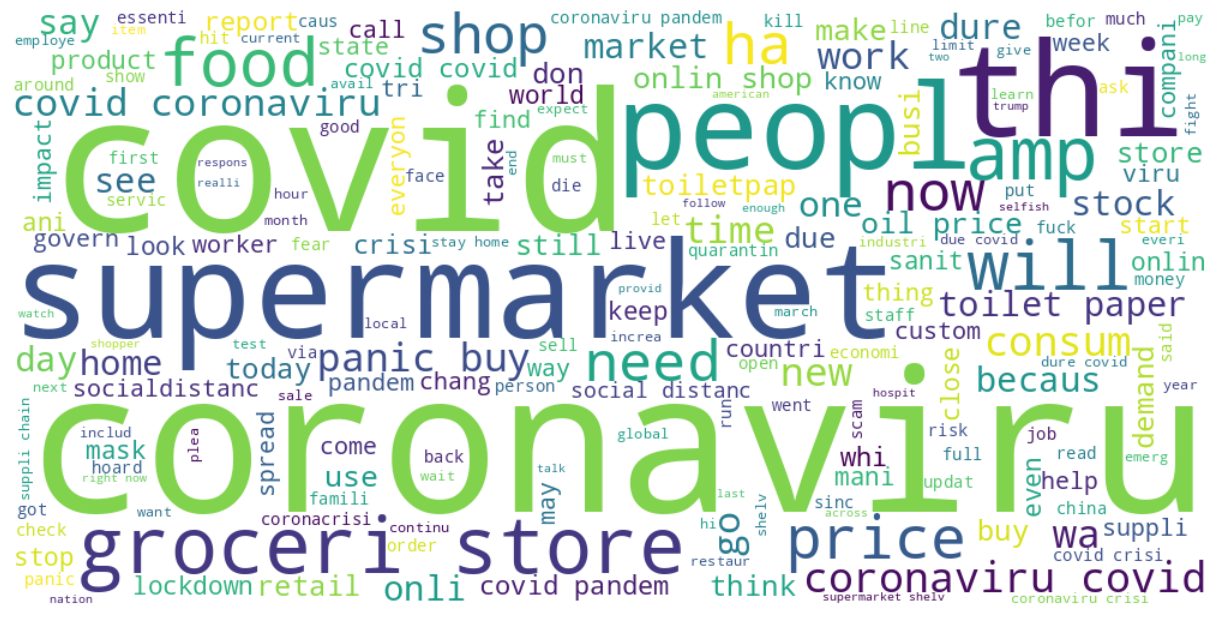

In [47]:
#WordCloud for neutral tweets
neutral_tweets = ' '.join([text for text in twt_df['Clean_tweet'][twt_df['Sentiment'] == 'Neutral']])
wordcloud = WordCloud(width=1000, height=500, background_color ='white').generate(neutral_tweets)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

**Chart - 12**

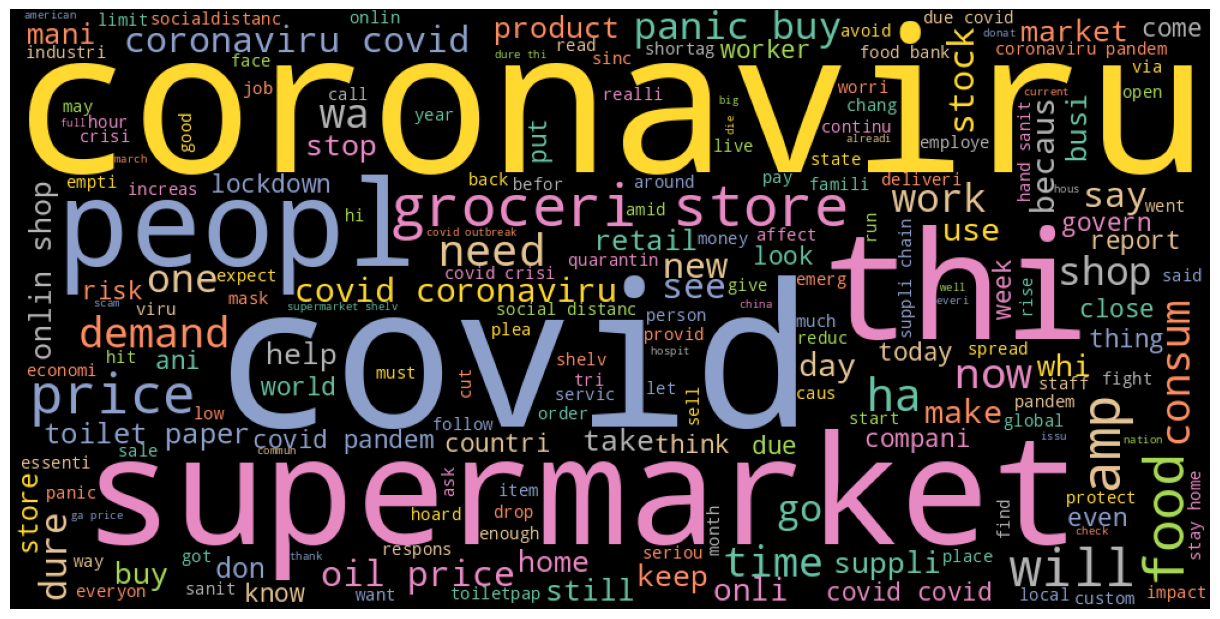

In [48]:
#WordCloud for negative tweets
negative_tweets = ' '.join([text for text in twt_df['Clean_tweet'][twt_df['Sentiment'] == 'Negative']])
wordcloud = WordCloud(width=1000, height=500, background_color ='black',colormap='Set2').generate(negative_tweets)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

*1. Why did you pick the specific chart?*
* To see the words properly which were tweeted most at the time of pandemic.

*2. What are the insight(s) found from the chart?*

* Here we can see the same words repeat in each of the wordcloud like coronavirus, grocery store, panic etc due to the abundance of these words in every tweet.

**Chart - 13**

**Bar plott**-

* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle

* It shows relative numbers or proportions of multiple categories.

* We can summarize a large data set in visual form.

* Also we can estimate key values at a glance.

***Hashtags***

<Axes: xlabel='Hashtag', ylabel='count'>

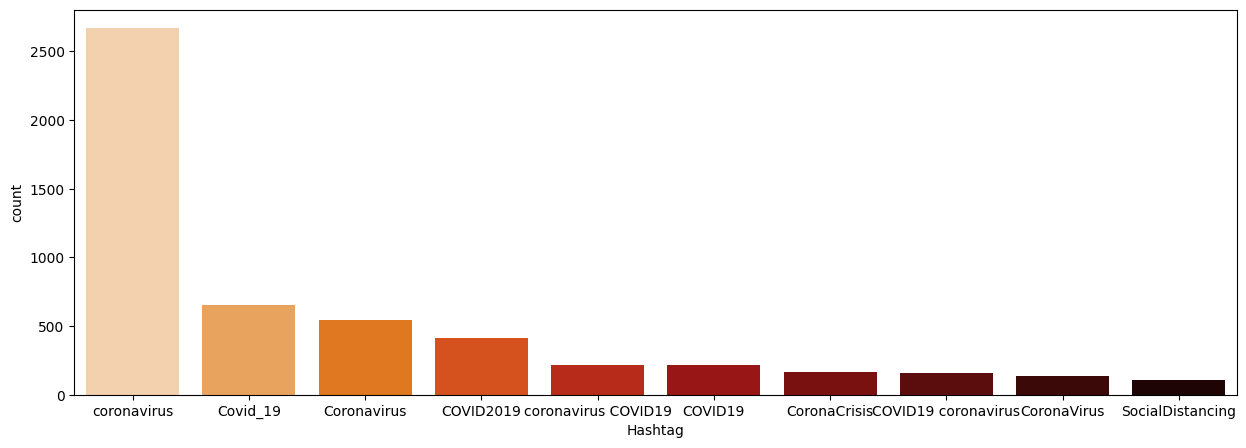

In [49]:
# Function for different hashtags
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=#)\w+',OriginalTweet)
    return " ".join(line)
twt_df['hash']=twt_df['OriginalTweet'].apply(lambda x:find_hash(x))
temp=twt_df['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="Hashtag",y="count", data = temp,palette='gist_heat_r', ax=ax)

*1. What are the insight(s) found from the chart?*
* The hastag used most was coronavirus.

**Chart - 14**

***Mentions***

<Axes: xlabel='Mentions', ylabel='count'>

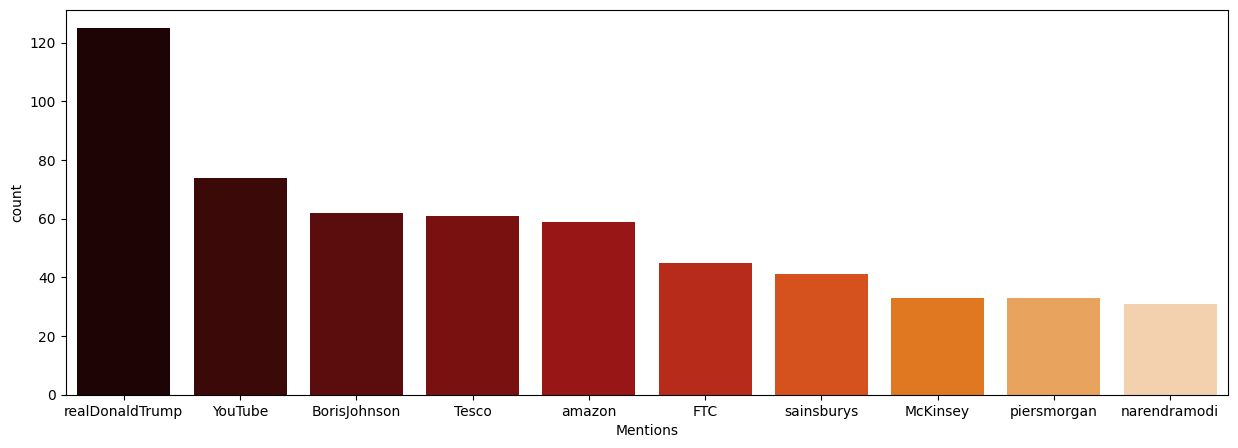

In [50]:
# Function for mentions
def mentions(OriginalTweet):
    line=re.findall(r'(?<=@)\w+',OriginalTweet)
    return " ".join(line)
twt_df['mentions']=twt_df['OriginalTweet'].apply(lambda x:mentions(x))

temp=twt_df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="Mentions",y="count", ax=ax, data = temp,palette='gist_heat')

*1. What are the insight(s) found from the chart?*
* RealDonaldtrump was mentioned the most.

**Chart - 15**

***Common Words***

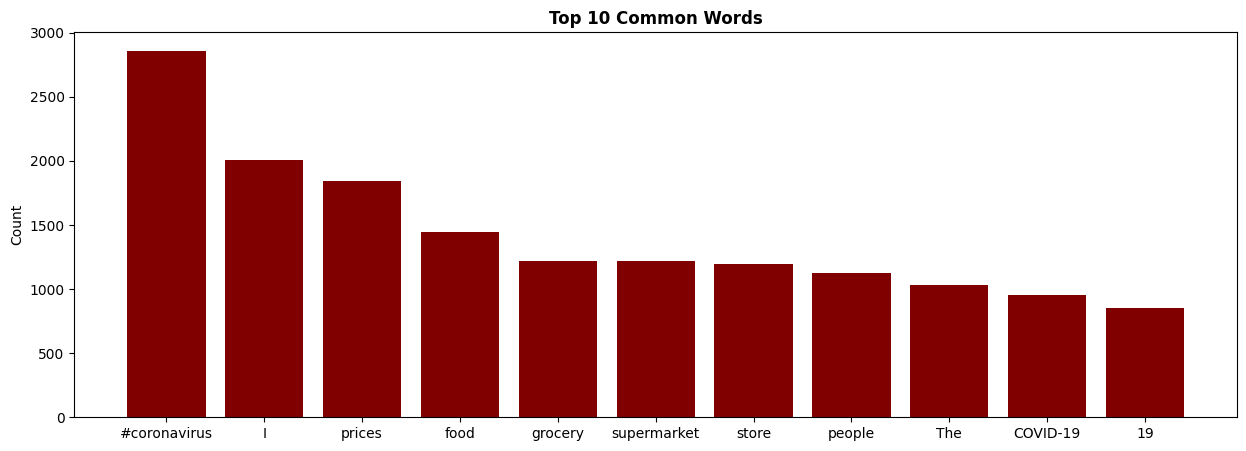

In [51]:
# Barplot for common words
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
plt.figure(figsize = (15,5))
plt.bar(x,y, color='maroon')
plt.title('Top 10 Common Words', fontweight='bold')
plt.ylabel('Count')
plt.show()

*1. What are the insight(s) found from the chart?*
* The word coronavirus and I was used most.

# **Required Features**

In [52]:
# Creating new dataframe
tweet_df = twt_df[['Clean_tweet', 'Sentiment']]
tweet_df.head(5)

,Clean_tweet,Sentiment
0,,Neutral
1,advic talk your neighbour famili exchang phone...,Positive
2,coronaviru australia woolworth give elderli di...,Positive
3,food stock not the onli one which empti pleas ...,Positive
4,readi supermarket dure the #covid outbreak not...,Neutral


# **5. Feature Engineering**

***Feature encoding***

* We had 5 classes in our sentiment columns which i converted into 3 for better understanding.

* Also, converting 3 classes and using label encoding for better results-

            'Negative': 0,
            'Neutral': 1,
            'Positive':2

In [53]:
#Encoding on faetures
encoding = {'Negative': 0,
            'Neutral': 1,
            'Positive':2
            }

labels = ['Negative', 'Neutral', 'Positive']
           

tweet_df['Sentiment'].replace(encoding, inplace=True) 

In [54]:
# Checking the updated dataframe
tweet_df.head()

,Clean_tweet,Sentiment
0,,1
1,advic talk your neighbour famili exchang phone...,2
2,coronaviru australia woolworth give elderli di...,2
3,food stock not the onli one which empti pleas ...,2
4,readi supermarket dure the #covid outbreak not...,1


In [55]:
# Checking information again
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clean_tweet  41157 non-null  object
 1   Sentiment    41157 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 643.2+ KB


In [56]:
# Checking shape
tweet_df.shape

(41157, 2)

In [57]:
# Applying stopwards to Clean_tweet column
tweet_df['Clean_tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                       []
1        [v, c,  , l, k,  , u, r,  , n, e, g, h, b, u, ...
2        [c, r, n, v, r, u,  , u, r, l,  , w, l, w, r, ...
3        [f,  , c, k,  , n,  , h, e,  , n, l,  , n, e, ...
4        [r, e,  , u, p, e, r, r, k, e,  , u, r, e,  , ...
                               ...                        
41152    [r, l, n,  , p, l,  , f, f, e, r,  , c, k,  , ...
41153    [r, e, p, n,  , c, p, l, n,  , n,  , p, r, v, ...
41154    [u,  , k, n, w,  , g, e,  , u, g, h,  , w, h, ...
41155    [w, r, n, g,  , h,  , h, e,  , e, l, l,  , h, ...
41156    [w, e, l, l,  , n, e, w,  , u, e,  , r, f,  , ...
Name: Clean_tweet, Length: 41157, dtype: object

In [58]:
# Checking null values
tweet_df.isnull().sum()

Clean_tweet    0
Sentiment      0
dtype: int64

In [59]:
# Null values showing false 
pd.isnull(tweet_df["Sentiment"])

0        False
1        False
2        False
3        False
4        False
         ...  
41152    False
41153    False
41154    False
41155    False
41156    False
Name: Sentiment, Length: 41157, dtype: bool

In [60]:
# Looking into dataframe
tweet_df.head(5)

,Clean_tweet,Sentiment
0,,1
1,advic talk your neighbour famili exchang phone...,2
2,coronaviru australia woolworth give elderli di...,2
3,food stock not the onli one which empti pleas ...,2
4,readi supermarket dure the #covid outbreak not...,1


***It can be seen there are no nan/null value which means our dataset is clean and is ready for being used for model development.***

## ***6. ML Model Implementation***

# **Spitting Dataset into Training And Testing Dataset ( For Multiclass Classification)**

* Before, fitting any model we split the dataset into a training and test set.

* Doing this means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data.

* The proportions may vary from 60:40, 70:30, 75:25 but mostly 80:20 is used for training and testing respectively.

In [61]:
# Splitting the dataset into training and testing datasets.
train,test = train_test_split(tweet_df,test_size = 0.2,random_state=0,stratify = tweet_df.Sentiment.values)
# Here we stratify, because the dependent variables should be equally distributed among training and testing datasets.

print("train shape : ", train.shape)
print("valid shape : ", test.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


# **Counter Vectorizer For Multi Class Classification**

**Count vectorizer**-

* Count vectorizer is the way of converting the text into DTM and all cells in DTM is nothing but count of the particular word for that particular document.

* CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach)

In [62]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
# Applying stopwords and CountVectorizer for NLP
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

# Fitting using transform  
X_train = vectorizer.fit_transform(train.Clean_tweet.values)
X_test = vectorizer.transform(test.Clean_tweet.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

# Printing the shape of train and test(valid) values
print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_test.shape)

X_train.shape :  (32925, 27134)
X_valid.shape :  (8232, 27134)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# **Naive Bayes Classifier for multiclass**

* Naive bayes is derived from Bayes' probability theory and is used for text classification, also it uses it's concept in order to get conditional probablity.

* It's an classification algorithm which is used to classify data points into classes.

* It is an generative model.

In [65]:
#MODEL-1
nbc = MultinomialNB()
nbc.fit(X_train,y_train)
# Here we have used Multi nominal Naive Bayes, because we have discrete features. It works with intergers and fractions of tf-idf also.
naive_prediction = nbc.predict(X_test)
naive_accuracy = accuracy_score(y_test,naive_prediction)
print("Training accuracy  : ",nbc.score(X_train,y_train))
print("Testing accuracy   : ",naive_accuracy )
print(classification_report(naive_prediction,y_test))

Training accuracy  :  0.7477600607441154
Testing accuracy   :  0.5965743440233237
              precision    recall  f1-score   support

           0       0.28      0.44      0.35      1261
           1       0.50      0.56      0.53      2335
           2       0.84      0.66      0.74      4636

    accuracy                           0.60      8232
   macro avg       0.54      0.55      0.54      8232
weighted avg       0.66      0.60      0.62      8232



**Precision** - The ratio of how many things we said, were positive and for real they were positive is called the precision.

**Recall** - The real positives were there and they were detected correctly, is recall.

**F1 score** - F1 score is an combo of recall and precision, it can be said that we take out average of precision and recall.
But this avg is not arithmetic mean or geometric, its harmonic mean.

Harmonic mean is a mathematical thing which is always on side of low value.

# **Support vector machine**

* Support vector machine is robust and is applicable to lot of scenarios.

* It can be implemented to both classification and regression.

* SVM classifies the data while selecting the hyperplane, which classifies all data points as widely as possible.

* We want distance between hyperplane and points, so that in future when we deal with unseen data the hyperplane selected by SVM will perform better.

* The distance between the points and hyperplane is called margin. It tries to find the plane which increases this margin,that's why it is sometimes called Margin Maximizing Hyperplane. 

In [ ]:
#MODEL-2
svm = SVC()
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test,svm_prediction)
print("Train accuracy score : ",svm.score(X_train,y_train))
print("Test accuracy score : ",svm_accuracy )
print(classification_report(svm_prediction,y_test))

# **Random Forest Classifier**

* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

* Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, it predicts the final output.

* It predicts output with high accuracy, even for the large dataset it runs efficiently, also maintains accuracy when a large proportion of data is missing.

In [ ]:
#MODEL-3
classifier = RandomForestClassifier() 
classifier.fit(X_train, y_train)
train_preds1 =  classifier.predict(X_train)
test_preds1  = classifier.predict(X_test)
train_accuracy1=accuracy_score(y_train,train_preds1)
test_accuracy1=accuracy_score(y_test,test_preds1)
print("Train accuracy score: ",classifier.score(X_train,y_train))
print("Test accuracy score : ",test_accuracy1 )
print(classification_report(test_preds1,y_test))

Train accuracy score:  0.9968109339407745
Test accuracy score :  0.6693391642371235
              precision    recall  f1-score   support

           0       0.29      0.59      0.39       985
           1       0.69      0.63      0.66      2898
           2       0.86      0.71      0.78      4349

    accuracy                           0.67      8232
   macro avg       0.61      0.64      0.61      8232
weighted avg       0.73      0.67      0.69      8232



# **Logistic Regression**

* It’s a classification algorithm, that is used where the response variable is categorical. 

* The idea of Logistic Regression is to find a relationship between features and probability of particular outcome.

**Hyperparameter tuning**

In [ ]:
#MODEL-4
logistic = LogisticRegression()

#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500, 1000] }


#fit the parameter with Cross Validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, verbose = 3, cv = 5)
#training model
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500,
                               1000],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [ ]:
print(grid_lr.best_score_)
print(grid_lr.best_params_)

0.6726195899772209
{'C': 0.5, 'penalty': 'l2'}


In [ ]:
#prediction
y_pred_lr_train = grid_lr.predict(X_train)
y_pred_lr_test = grid_lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred_lr_test)
print("Training accuracy Score    : ",grid_lr.score(X_train,y_train))
print("Validation accuracy Score : ",lr_accuracy )
print(classification_report(y_pred_lr_test,y_test))

Training accuracy Score    :  0.8581321184510251
Validation accuracy Score :  0.6721331389698737
              precision    recall  f1-score   support

           0       0.35      0.47      0.41      1476
           1       0.67      0.58      0.63      3041
           2       0.85      0.82      0.83      3715

    accuracy                           0.67      8232
   macro avg       0.62      0.63      0.62      8232
weighted avg       0.69      0.67      0.68      8232



# **Stochastic Gradient Descent**

* Stochastic gradient descent is an optimization algorithm used in machine learning applications to find the model parameters that correspond to the best fit between predicted and actual output.

* In SGD update is done with just seeing one single row, then another row and update occurs.

* In one single epoch many updates are done, in this way SGD is faster as it needs less no, of epochs.

**Hyperparameter tuning**

In [ ]:
#MODEL-5
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

param_grid ={}

# fitting parameter with Cross Validation
grid_sgd = GridSearchCV(sgd_clf, param_grid, verbose = 3, cv = 5)

grid_sgd.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.678 total time=   0.8s
[CV 2/5] END ..................................., score=0.672 total time=   1.0s
[CV 3/5] END ..................................., score=0.671 total time=   0.9s
[CV 4/5] END ..................................., score=0.676 total time=   0.9s
[CV 5/5] END ..................................., score=0.676 total time=   0.8s


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0), param_grid={},
             verbose=3)

In [ ]:
# prediction
y_pred_sgd_train = grid_sgd.predict(X_train)
y_pred_sgd_test = grid_sgd.predict(X_test)

sgd_accuracy = accuracy_score(y_test,y_pred_sgd_test)

print("Train accuracy Score    : ",grid_sgd.score(X_train,y_train))
print("Test accuracy score : ",sgd_accuracy )
print(classification_report(y_pred_sgd_test,y_test))

Train accuracy Score    :  0.8476233864844344
Test accuracy score :  0.6777210884353742
              precision    recall  f1-score   support

           0       0.29      0.50      0.37      1147
           1       0.72      0.59      0.65      3239
           2       0.86      0.81      0.83      3846

    accuracy                           0.68      8232
   macro avg       0.62      0.63      0.62      8232
weighted avg       0.73      0.68      0.69      8232



# **Summary of Models**

In [ ]:
# Summary of models
model_performance = pd.DataFrame({'Classification Models': ['Support Vector Machines', 'Naive Bayes Model', 'Random Forest', 'Logistic Regression','Stochastic gradient descent'],'Testing score': [ svm_accuracy, naive_accuracy, test_accuracy1, lr_accuracy, sgd_accuracy,]})
model_performance.sort_values(by='Testing score', ascending=False)

,Classification Models,Testing score
4,Stochastic gradient descent,0.677721
0,Support Vector Machines,0.673105
3,Logistic Regression,0.672133
2,Random Forest,0.669339
1,Naive Bayes Model,0.596574


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

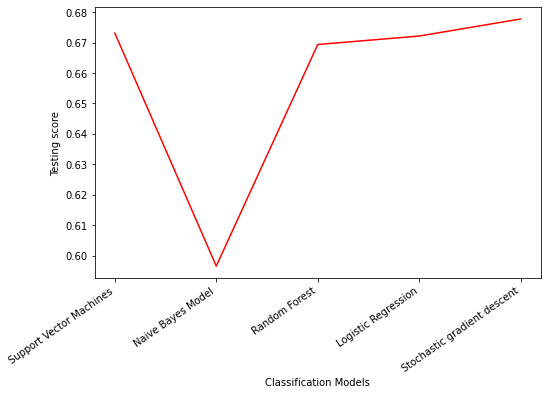

In [ ]:
# Creating plot between Test accuracy for all models used.
plt.figure(figsize=(8,5))
sns.lineplot(data = model_performance, x='Classification Models', y='Testing score', color='red')
plt.xticks(rotation=35, ha='right')

# **Conclusion** -

**On EDA-**

* Original dataset contained 6 columns and 41157 rows.

* The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.

* "Location" column contains approx. 20.87% of Null values.

* In order to analyze the data we required only two columns "OriginalTweet" & "Sentiment". Hence, to avoid NaN values in "Location" columns i did not used it further.

* London was the most tweeting location from the bunch.

* On 20-03-2020, when maximum tweet took place showing the maximum sentiment types. Among all the sentiments, positive sentiment dominates the most followed by the negative in second place.

* There were five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive. So, I merged Extremely Positive with positive and Extremely Negative with Negative. And use encoding with value ‘0’ for negative, ‘1’ for neutral and ‘2’ for positive.

* Among top 10 mentions in tweets realDonaldTrump was the most mentioned name and "#coronavirus" was most trendiest hashtag during that period.



**On Model Training-**


* For the project five models were used namely Naive Bayes Classifier,Stochastic Gradient Descent, Random Forest Classifier,Support Vector Machine, Logistic Regression.

* Through which Stochastic gradient descent with Hyperparameter tuning performed best with test score 0.677

* And even after Hyperparameter tuning their is not much improvement in the test accuracy.